In [19]:
import os
import requests
import simplejson as json
import pandas as pd
import dill

In [228]:
def voice_actors(results):
    voice_li = []
    for i in range(min(len(results['characters']),2)):
        if results['characters'][i]['voice_actors']!=[]:
            voice_li.append(results['characters'][i]['voice_actors'][0]['name'])
        else:
            continue
    return voice_li

In [221]:
def get_main(results):
    
    genres = []
    
    animeinfo = results
    anime_id = animeinfo['mal_id']
    num_episode = animeinfo['episodes']
    duration = animeinfo['duration'].split()[0]
    intro = animeinfo['synopsis']
    for i in animeinfo['genres']:
        genres.append(i['name'])
    score = animeinfo['score']
    popularity = animeinfo['popularity']
    return anime_id,num_episode,duration,intro,genres,score,popularity

In [222]:
def get_producer(results):
    producer = []
    re = results['staff']
    for i in re:
        if 'Producer' in i['positions']:
            producer.append(i['name'])
        else:
            continue
    return producer

In [223]:
def get_director(results):
    director = []
    for i in results['staff']:
        if 'Director' in i['positions']:
            director.append(i['name'])
        else:
            continue
    return director

In [224]:
def get_chief(results):
    cheif_dire=[]
    for i in results['staff']:
        if 'Chief Animation Director' in i['positions']:
            cheif_dire.append(i['name'])
        else:
            continue
    return cheif_dire

In [225]:
def get_script(results):
    script=[]
    for i in results['staff']:
        if 'Script' in i['positions']:
            script.append(i['name'])
        else:
            continue
    return script

In [226]:
def get_music(results):
    music=[]
    for i in results['staff']:
        if 'Music' in i['positions']:
            music.append(i['name'])
        else:
            continue
    return music

In [9]:
#test cell
results = requests.get('https://api.jikan.moe/v3/anime/1/characters_staff')
json.loads(results.text)['staff'][0]

{'mal_id': 40009,
 'url': 'https://myanimelist.net/people/40009/Yutaka_Maseba',
 'name': 'Maseba, Yutaka',
 'image_url': 'https://cdn.myanimelist.net/images/voiceactors/3/40216.jpg?s=12b0478620ef4f60243c8b4d9635bd26',
 'positions': ['Producer']}

In [10]:
#test cell
maldata = pd.DataFrame(columns=['anime_id','num_episode','duration','intro','genres','score','popularity','voice',\
                           'producer','script','cheif_dire','director','music'])

In [146]:
#remove file if needed be careful
#os.remove("capstonefile.csv")

In [18]:
#create a file
import csv
f = open('capstonefile.csv','w')

In [148]:
#reset dataframe
maldata = pd.DataFrame(columns=['anime_id','num_episode','duration','intro','genres','score','popularity','voice',\
                           'producer','script','cheif_dire','director','music'])

In [142]:
def check_page(results):
    if results.status_code == 404:
        return True
    elif results.status_code == 500:
        return True
    else:
        return False

In [103]:
results = requests.get('https://myanimelist.net/info.php?search=%25%25%25&go=relationids&divname=relationGen1')

In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(results.text,'lxml')
parent = soup.find('table',attrs={'cellspacing': '0'})

In [23]:
li = parent.find_all('td', attrs={'align':'center'})
ani_id = []
for i in range(len(li)//2):
    if li[(2*i+1)].text in ['TV','OVA']:
        ani_id.append(li[2*i].text)

In [29]:
import dill
dill.dump(myanime, open('animeid.pkd', 'wb'))

In [154]:
animeid = dill.load(open('animeid.pkd', 'rb'))

In [155]:
myanime = [s for s in animeid if s.isdigit()]

In [156]:
len(myanime)

8465

In [160]:
import dill
mainli =[]
newreli = []
for aniid in myanime:
    sleep(2)
    results = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid))
    if results.status_code == 429:
        sleep(12)
        results = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid))
    mainli.append(json.loads(results.text))
    newre = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid)+'/characters_staff')
    if newre.status_code == 429:
        sleep(12)
        newre = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid)+'/characters_staff')
    newreli.append(json.loads(newre.text))
    print(aniid)

dill.dump(mainli, open('mainli.pkd', 'wb'))
dill.dump(newreli, open('newli.pkd','wb'))

1
6
7
8
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
33
44
45
48
49
50
51
52
53
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
71
72
73
74
75
76
77
79
80
81
82
84
85
86
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
141
142
143
144
145
146
147
148
149
150
151
152
153
154
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
186
188
189
190
193
194
195
196
197
198
200
201
202
203
204
205
206
207
208
209
210
211
213
214
215
217
218
220
221
222
223
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
305
306
307
308
309
310
311
312
3

2551
2552
2553
2554
2555
2556
2557
2558
2559
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2581
2582
2583
2584
2585
2586
2588
2590
2592
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2607
2608
2609
2610
2612
2613
2618
2619
2620
2622
2624
2679
2681
2683
2684
2685
2686
2687
2688
2690
2692
2693
2694
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2712
2713
2714
2716
2717
2718
2719
2721
2723
2725
2726
2727
2730
2731
2732
2734
2735
2736
2737
2738
2739
2740
2741
2742
2744
2745
2747
2748
2749
2752
2754
2757
2758
2762
2766
2769
2771
2772
2775
2776
2777
2778
2779
2780
2781
2782
2783
2785
2786
2787
2788
2789
2790
2791
2792
2794
2795
2796
2797
2798
2799
2800
2803
2804
2805
2806
2808
2809
2810
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2834
2835
2836
2837
2838
2839
2841
2852
2858
2859
2861
2862
2863
2864
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2881
2882
2883
2885
2891


6893
6895
6899
6900
6901
6902
6903
6904
6907
6917
6918
6919
6920
6932
6946
6947
6956
6958
6959
6970
6971
6973
6974
6979
6980
6981
6986
6987
6989
7004
7044
7048
7052
7053
7054
7058
7059
7062
7079
7081
7082
7088
7090
7092
7103
7106
7109
7110
7113
7122
7124
7139
7148
7152
7154
7155
7160
7162
7175
7176
7177
7178
7179
7189
7192
7193
7211
7216
7245
7247
7262
7264
7265
7266
7268
7270
7276
7279
7294
7307
7334
7343
7374
7395
7396
7398
7405
7411
7416
7419
7430
7448
7452
7455
7456
7458
7459
7463
7475
7479
7482
7505
7522
7525
7549
7551
7559
7561
7573
7575
7580
7581
7582
7583
7588
7590
7591
7592
7593
7596
7597
7601
7605
7611
7612
7619
7625
7627
7629
7639
7643
7645
7647
7655
7661
7662
7668
7669
7674
7681
7691
7708
7712
7720
7723
7724
7730
7745
7748
7750
7751
7761
7762
7768
7769
7774
7779
7785
7791
7793
7803
7808
7817
7818
7836
7845
7858
7864
7867
7897
7904
7908
7914
7915
7939
7955
7956
7960
7969
7972
7980
7981
7982
8011
8017
8025
8026
8039
8041
8057
8063
8064
8065
8074
8078
8079
8086
8101
8110
8111


17307
17315
17339
17353
17359
17379
17389
17395
17405
17423
17427
17457
17467
17471
17473
17481
17483
17485
17487
17491
17497
17501
17505
17513
17521
17537
17539
17541
17543
17549
17599
17601
17613
17615
17619
17621
17623
17624
17641
17643
17649
17651
17655
17659
17667
17669
17671
17681
17687
17703
17705
17707
17725
17727
17729
17731
17733
17739
17741
17745
17747
17777
17821
17823
17825
17827
17831
17833
17849
17855
17867
17873
17875
17893
17895
17903
17909
17917
17919
17933
17951
17953
17955
17957
17969
17977
17979
17981
17983
17985
17987
17989
17991
18001
18005
18007
18029
18031
18033
18039
18041
18055
18071
18081
18083
18085
18087
18095
18097
18099
18115
18119
18121
18133
18137
18139
18151
18153
18155
18177
18179
18191
18195
18197
18199
18205
18227
18229
18241
18245
18247
18275
18277
18295
18365
18391
18393
18397
18411
18441
18443
18447
18451
18455
18603
18619
18629
18631
18635
18653
18655
18661
18671
18677
18679
18683
18689
18691
18693
18695
18703
18713
18731
18743
18745
18747
1875

30531
30532
30533
30543
30544
30547
30549
30567
30571
30583
30602
30605
30614
30649
30651
30652
30654
30658
30679
30694
30702
30705
30709
30721
30723
30727
30736
30740
30741
30743
30746
30749
30751
30753
30754
30759
30760
30761
30762
30763
30764
30765
30770
30777
30782
30795
30806
30812
30817
30818
30826
30829
30831
30851
30875
30885
30891
30892
30893
30895
30898
30901
30906
30911
30926
30927
30928
30929
30930
30931
30932
30933
30935
30938
30939
30940
30941
30942
30943
30944
30947
30948
30958
30959
30961
30968
30969
30970
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30988
30989
30991
30997
30998
30999
31000
31001
31002
31003
31004
31005
31007
31008
31009
31015
31016
31018
31019
31043
31044
31049
31050
31054
31068
31071
31078
31080
31091
31098
31101
31109
31117
31118
31139
31143
31147
31150
31156
31157
31163
31168
31173
31174
31177
31178
31181
31189
31196
31211
31221
31223
31227
31229
31237
31239
31240
31246
31251
31297
31317
31318
31319
31321
31327
31331
3133

37232
37233
37244
37245
37254
37255
37258
37259
37263
37268
37281
37283
37286
37287
37300
37302
37320
37324
37325
37326
37328
37338
37340
37345
37346
37347
37349
37359
37360
37364
37368
37369
37374
37377
37379
37393
37395
37403
37405
37422
37424
37426
37428
37430
37433
37435
37446
37447
37448
37449
37450
37451
37458
37467
37472
37474
37475
37476
37481
37483
37484
37487
37490
37491
37493
37494
37496
37497
37509
37510
37517
37520
37521
37522
37525
37555
37559
37560
37561
37569
37571
37576
37578
37579
37584
37585
37587
37591
37597
37598
37601
37611
37614
37616
37621
37630
37646
37651
37653
37657
37662
37675
37686
37698
37699
37711
37714
37716
37722
37739
37744
37747
37749
37750
37752
37769
37773
37778
37779
37780
37786
37787
37798
37799
37806
37815
37823
37869
37870
37873
37884
37890
37892
37893
37910
37920
37924
37926
37927
37939
37940
37941
37942
37943
37944
37945
37951
37952
37956
37958
37962
37964
37965
37968
37972
37975
37976
37978
37979
37982
37984
37988
37989
37990
37991
37992
3799

In [208]:
from time import sleep
#request from web and get information
counter = 0
for aniid in myanime:
    sleep(2)
    results = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid))
    if check_page(results):
        print(id)
        continue
    elif results.status_code == 429:
        sleep(12)
        results = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid))
        if check_page(results)== 429: 
            sleep(10)
            results = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid))
        newre =requests.get('https://api.jikan.moe/v3/anime/'+str(aniid)+'/characters_staff')
        anime_id,num_episode,duration,intro,genres,score,popularity= get_main(results)
        maldata = maldata.append({'anime_id':anime_id,\
                       'num_episode': num_episode,\
                       'duration':duration,\
                       'intro':intro,\
                       'genres':genres,\
                       'score':score,\
                       'popularity':popularity,\
                        'voice': voice_actors(newre),\
                        'producer': get_producer(newre),\
                        'script': get_script(newre),\
                        'cheif_dire':get_chief(newre),\
                        'director':get_director(newre),\
                        'music':get_music(newre)},ignore_index=True)
        print(counter)
        with open('capstonefile.csv', 'a') as f:
            maldata.iloc[[counter]].to_csv(f, header=False)
        counter += 1
    else:
        newre = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid)+'/characters_staff')
        if newre.status_code == 429:
            sleep(12)
            newre = requests.get('https://api.jikan.moe/v3/anime/'+str(aniid)+'/characters_staff')
        anime_id,num_episode,duration,intro,genres,score,popularity= get_main(results)
        maldata = maldata.append({'anime_id':anime_id,\
                       'num_episode': num_episode,\
                       'duration':duration,\
                       'intro':intro,\
                       'genres':genres,\
                       'score':score,\
                       'popularity':popularity,\
                        'voice': voice_actors(newre),\
                        'producer': get_producer(newre),\
                        'script': get_script(newre),\
                        'cheif_dire':get_chief(newre),\
                        'director':get_director(newre),\
                        'music':get_music(newre)},ignore_index=True)
        print(counter)
        with open('capstonefile.csv', 'a') as f:
            maldata.iloc[[counter]].to_csv(f, header=False)
        counter += 1

In [204]:
results = requests.get('https://api.jikan.moe/v3/anime/8079/')

In [205]:
json.loads(results.text)

{'request_hash': 'request:anime:9d7a3e61234770911ceca07e64cf42fda73529de',
 'request_cached': False,
 'request_cache_expiry': 86400,
 'mal_id': 8079,
 'url': 'https://myanimelist.net/anime/8079/Tamala_2010__A_Punk_Cat_in_Space_OVA',
 'image_url': 'https://cdn.myanimelist.net/images/anime/8/19770.jpg',
 'trailer_url': None,
 'title': 'Tamala 2010: A Punk Cat in Space OVA',
 'title_english': None,
 'title_japanese': 'TAMALA2010 a punk cat in space',
 'title_synonyms': ['Tamala 2010 OVA',
  'Tamala 2010 - A Punk Cat In Space (2007)',
  'Tamala on Parade',
  "Tamala's Wild party"],
 'type': 'OVA',
 'source': 'Original',
 'episodes': 2,
 'status': 'Finished Airing',
 'airing': False,
 'aired': {'from': '2007-08-24T00:00:00+00:00',
  'to': None,
  'prop': {'from': {'day': None, 'month': None, 'year': None},
   'to': {'day': None, 'month': None, 'year': None}},
  'string': 'Aug 24, 2007'},
 'duration': '17 min per ep',
 'rating': 'G - All Ages',
 'score': 5.81,
 'scored_by': 240,
 'rank': 882

In [206]:
mainli[3705] = json.loads(results.text)

In [207]:
mainli[3705]

{'request_hash': 'request:anime:9d7a3e61234770911ceca07e64cf42fda73529de',
 'request_cached': False,
 'request_cache_expiry': 86400,
 'mal_id': 8079,
 'url': 'https://myanimelist.net/anime/8079/Tamala_2010__A_Punk_Cat_in_Space_OVA',
 'image_url': 'https://cdn.myanimelist.net/images/anime/8/19770.jpg',
 'trailer_url': None,
 'title': 'Tamala 2010: A Punk Cat in Space OVA',
 'title_english': None,
 'title_japanese': 'TAMALA2010 a punk cat in space',
 'title_synonyms': ['Tamala 2010 OVA',
  'Tamala 2010 - A Punk Cat In Space (2007)',
  'Tamala on Parade',
  "Tamala's Wild party"],
 'type': 'OVA',
 'source': 'Original',
 'episodes': 2,
 'status': 'Finished Airing',
 'airing': False,
 'aired': {'from': '2007-08-24T00:00:00+00:00',
  'to': None,
  'prop': {'from': {'day': None, 'month': None, 'year': None},
   'to': {'day': None, 'month': None, 'year': None}},
  'string': 'Aug 24, 2007'},
 'duration': '17 min per ep',
 'rating': 'G - All Ages',
 'score': 5.81,
 'scored_by': 240,
 'rank': 882

In [194]:
dill.dump(newreli, open('newli.pkd','wb'))

In [209]:
dill.dump(mainli, open('mainli.pkd', 'wb'))

In [792]:
#remove file if needed be careful
#os.remove("capstonefile.csv")

In [352]:
#create a file
import csv
f = open('capstonefile.csv','w')

In [353]:
#reset dataframe
maldata = pd.DataFrame(columns=['anime_id','num_episode','duration','intro','genres','score','popularity','voice',\
                           'producer','script','cheif_dire','director','music'])

In [354]:
with open('capstonefile.csv', 'a') as f:
    maldata.to_csv(f, header=True)

In [355]:
counter = 0
for i in range(len(mainli)):
    anime_id,num_episode,duration,intro,genres,score,popularity = get_main(mainli[i])
    maldata = maldata.append({'anime_id':anime_id,\
                       'num_episode': num_episode,\
                       'duration':duration,\
                       'intro':intro,\
                       'genres':genres,\
                       'score':score,\
                       'popularity':popularity,\
                        'voice': voice_actors(newreli[i]),\
                        'producer': get_producer(newreli[i]),\
                        'script': get_script(newreli[i]),\
                        'cheif_dire':get_chief(newreli[i]),\
                        'director':get_director(newreli[i]),\
                        'music':get_music(newreli[i])},ignore_index=True)
    print(counter)
    with open('capstonefile.csv', 'a') as f:
        maldata.iloc[[counter]].to_csv(f, header=False)
    counter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082


3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750


5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418


6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065


In [356]:
import pandas as pd
df = pd.read_csv('capstonefile.csv')
df.head(10)

,Unnamed: 0,anime_id,num_episode,duration,intro,genres,score,popularity,voice,producer,script,cheif_dire,director,music
0,0,1,26.0,24,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.81,38,"['Ishizuka, Unshou', 'Yamadera, Kouichi']","['Maseba, Yutaka', 'Minami, Masahiko']","['Watanabe, Shinichiro', 'Kawamori, Shoji', 'M...","['Kawamoto, Toshihiro']","['Watanabe, Shinichiro']","['Kanno, Yoko', 'Seatbelts', 'Tchaikovsky, Pyo..."
1,1,6,26.0,24,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",8.29,153,"['Tsuru, Hiromi', 'Yukino, Satsuki']","['Kitayama, Shigeru', 'Maseba, Yutaka']","['Kuroda, Yousuke']",[],"['Nishimura, Satoshi']","['Imahori, Tsuneo']"
2,2,7,26.0,25,Witches are individuals with special powers li...,"['Action', 'Magic', 'Police', 'Supernatural', ...",7.32,1227,"['Freeman, Crispin', 'Ruff, Michelle']",[],[],[],"['Kujou, Rion', 'Murase, Shukou']","['Iwasaki, Taku']"
3,3,8,52.0,23,It is the dark century and the people are suff...,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",7.03,3892,"['Grant, Tiffany', 'Hisakawa, Aya']","['Seki, Hiromi']","['Shimoyama, Kento']","['Yamamuro, Tadayoshi']","['Nagamine, Tatsuya']","['Takaki, Hiroshi']"
4,4,15,145.0,23,Sena is like any other shy kid starting high s...,"['Action', 'Sports', 'Comedy', 'Shounen']",8.03,882,"['Hirano, Aya', 'Tamura, Atsushi']","['Miyake, Masanori']","['Nakase, Rika', 'Yamashita, Kenichi']",[],"['Nishita, Masayoshi']","['Otani, Kow']"
5,5,16,24.0,23,"Yuuta, Takumi, and Shinobu share a six-tatami ...","['Comedy', 'Drama', 'Josei', 'Romance', 'Slice...",8.11,571,"['Kudou, Haruka', 'Sugita, Tomokazu']",[],"['Kuroda, Yousuke']",[],"['Kasai, Kenichi']","['Hayashi, Yuzo']"
6,6,17,52.0,23,Kyosuke Kano has lived under the shadow of his...,"['Slice of Life', 'Comedy', 'Sports', 'Shounen']",7.66,3243,"['Vieira, Jose Manuel', 'Toriumi, Kousuke']",[],"['Suga, Yoshiyuki']","['Kase, Masahiro']",[],[]
7,7,18,24.0,27,Takumi Fujiwara and brothers Keisuke and Ryous...,"['Action', 'Cars', 'Sports', 'Drama', 'Seinen']",8.20,1247,"['Miki, Shinichiro', 'Seki, Tomokazu']",[],"['Vale, Eric']",[],"['Tominaga, Tsuneo']",[]
8,8,19,74.0,24,"Dr. Kenzou Tenma, an elite neurosurgeon recent...","['Drama', 'Horror', 'Mystery', 'Police', 'Psyc...",8.69,158,"['Noto, Mamiko', 'Sasaki, Nozomu']","['Maruyama, Masao', 'Tamura, Manabu']","['Nakamura, Ryousuke', 'Sunayama, Kurasumi']","['Kanemori, Yoshinori']","['Kojima, Masayuki']","['Haishima, Kuniaki']"
9,9,20,220.0,23,"Moments prior to Naruto Uzumaki's birth, a hug...","['Action', 'Adventure', 'Comedy', 'Super Power...",7.92,9,"['Nakamura, Chie', 'Inoue, Kazuhiko']","['Kobayashi, Noriko']","['Blum, Steven', 'Handler, Marc', 'Macek, Carl...",[],"['Date, Hayato']","['Masuda, Toshio']"


In [40]:
#newli = dill.load(open('newli.pkd','rb'))
mainli = dill.load(open('mainli.pkd', 'rb'))

In [358]:
len(newli)

8465

In [359]:
def get_producerid(results):
    producerid = []
    re = results['staff']
    for i in re:
        if 'Producer' in i['positions']:
            producerid.append(int(i['mal_id']))
        else:
            continue
    return producerid

In [360]:
def voice_actorsid(results):
    voice_id = []
    for i in range(min(len(results['characters']),2)):
        if results['characters'][i]['voice_actors']!=[]:
            voice_id.append(int(results['characters'][i]['voice_actors'][0]['mal_id']))
        else:
            continue
    return voice_id

In [361]:
def get_directorid(results):
    directorid = []
    for i in results['staff']:
        if 'Director' in i['positions']:
            directorid.append(int(i['mal_id']))
        else:
            continue
    return directorid

In [362]:
def get_chiefid(results):
    chief_id=[]
    for i in results['staff']:
        if 'Chief Animation Director' in i['positions']:
            chief_id.append(int(i['mal_id']))
        else:
            continue
    return chief_id

In [363]:
def get_scriptid(results):
    scriptid=[]
    for i in results['staff']:
        if 'Script' in i['positions']:
            scriptid.append(int(i['mal_id']))
        else:
            continue
    return scriptid

In [364]:
def get_musicid(results):
    musicid=[]
    for i in results['staff']:
        if 'Music' in i['positions']:
            musicid.append(int(i['mal_id']))
        else:
            continue
    return musicid

In [366]:
producerli =[]
voiceactorli = []
directorli = []
scriptli = []
chiefli = []
musicli = []
for i in newli:
    producerli.append(get_producerid(i))
    voiceactorli.append(voice_actorsid(i))
    directorli.append(get_directorid(i))
    chiefli.append(get_chiefid(i))
    scriptli.append(get_scriptid(i))
    musicli.append(get_musicid(i))

In [367]:
df['producerid']=producerli
df['voice_id']=voiceactorli
df['directorid'] = directorli
df['scriptid'] = scriptli
df['chiefid'] = chiefli
df['musicid'] = musicli

In [797]:
#os.remove("capstonefileanime.csv")

In [805]:
df['music'][0]

"['Kanno, Yoko', 'Seatbelts', 'Tchaikovsky, Pyotr Ilyich']"

In [798]:
with open('capstonefileanime.csv', 'a') as f:
    df.to_csv(f)

In [23]:
fulldf = pd.read_csv('capstonefileanime.csv')

In [24]:
fulldf['music'][0]

"['Kanno, Yoko', 'Seatbelts', 'Tchaikovsky, Pyotr Ilyich']"

In [25]:
len(fulldf)

8465

In [372]:
personli = []
for i in [producerli,voiceactorli,directorli,scriptli,chiefli,musicli]:
    for j in i:
        if j:
            for q in j:
                if q in personli:
                    continue
                else:
                    personli.append(q)

In [809]:
def getcontent(personid):
    results = requests.get('https://api.jikan.moe/v3/person/'+str(personid))
    if results.status_code == 200:
        return results
    else:
        sleep(20)
        return getcontent(personid)

In [810]:
counter = 0
personinfo=[]
for personid in personli:
    sleep(2)
    results = getcontent(personid)
    personinfo.append(json.loads(results.text))
    print(counter)
    counter += 1

dill.dump(personinfo, open('personlist.pkl', 'wb'))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109


3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748


In [26]:
#test cell
im = requests.get('https://cdn.myanimelist.net/images/voiceactors/3/40216.jpg')

In [27]:
#test cell
if im.status_code == 200:
    with open("./personimage/{}.jpg".format(idn[0]), 'wb') as f:
        f.write(im.content)

NameError: name 'idn' is not defined

In [57]:
results = requests.get('https://api.jikan.moe/v3/person/5055')

In [58]:
results.status_code

200

In [59]:
example=json.loads(results.text)

In [60]:
len(example['anime_staff_positions'])

97

In [63]:
showcasedict = {}

In [64]:
productionli = []
for i in example['anime_staff_positions']:
    productionli.append(i['anime']['mal_id'])
showcasedict[example['mal_id']] = productionli

In [65]:
len(showcasedict)

1

In [66]:
time = []
for i in mainli:
    if i['aired']:
         if i['aired']['from']:
            time.append(int(i['aired']['from'][0:4]))
         else:
            time.append(0)
    else:
        time.append(0)

In [67]:
len(time)

8465

In [68]:
df['time']=time

In [69]:
#showcasedict[5055]
#showcasedict[5089]

In [45]:
df = pd.read_csv('capstonefileanime.csv')

In [105]:
x = []
y = []
z = []
combine = []
genrelist=['Comedy','Action','Fantasy',]
for i in showcasedict[5055]:
    x.append(df[df['anime_id']==i]['time'].values.tolist())
    y.append(df[df['anime_id']==i]['genres'].values.tolist())
    z.append(df[df['anime_id']==i]['popularity'].values.tolist())

In [106]:
for i in range(len(y)):
    if y[i]:
        y[i]=y[i][0][2:-2].split("', '")

In [107]:
for i in range(len(x)):
    if x[i]:
        combine.append((x[i][0],y[i],z[i][0]))

In [108]:
combine[0]

(2005, ['Slice of Life', 'Supernatural', 'Drama', 'Romance'], 413)

In [109]:
years=[]
genres=[]

In [110]:
for i in x:
    if i:
        if i[0] not in years:
            years.append(i[0])
years.sort()
lenyear=len(years)

In [111]:
for i in y:
    if i:
        for j in i:
            if j not in genres:
                genres.append(j)
genres.sort()
lengenre=len(genres)

In [112]:
popularity=[[[0,0] for i in range(lengenre)] for i in range(lenyear)]

In [113]:
popyear = [[0,0] for i in range(lenyear)]

In [114]:
for i in combine:
    yearx=years.index(i[0])
    for j in i[1]:
        genrey=genres.index(j)
        popularity[yearx][genrey][0]+=1
        popularity[yearx][genrey][1]+=i[2]

In [115]:
for i in combine:
    yearx=years.index(i[0])
    popyear[yearx][0]+=1
    popyear[yearx][1]+=i[2]

In [116]:
for i in range(len(popularity)):
    for j in range(len(popularity[i])):
        if popularity[i][j][0] == 0:
            popularity[i][j]=0
            continue
        popularity[i][j]=popularity[i][j][1]/popularity[i][j][0]

In [117]:
popularity1 = popularity[:15]

In [119]:
pop = []

In [120]:
for x in popyear:
    pop.append(x[1]/x[0])

AttributeError: 'list' object has no attribute 'ndim'

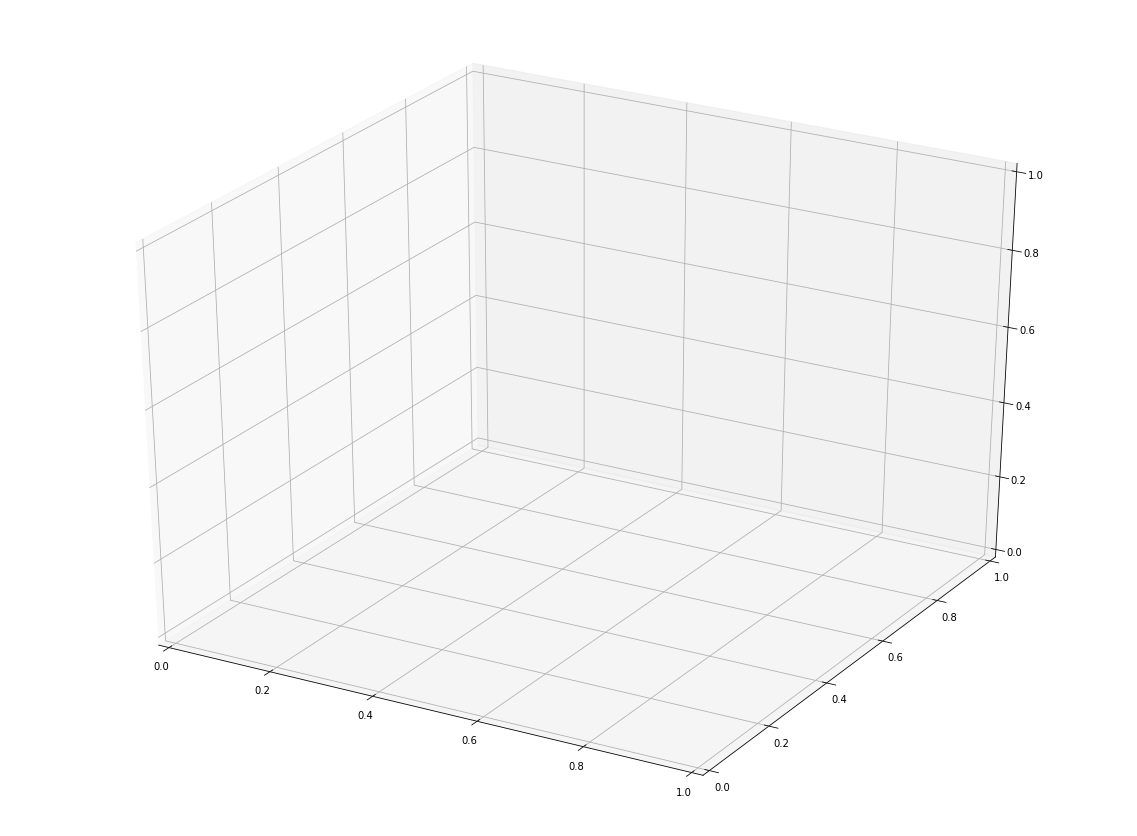

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,15))
X=np.arange(15)
Y=np.arange(26)
ax = fig.add_subplot(111, projection='3d')
X,Y = np.meshgrid(X,Y)
ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1,cmap='rainbow',alpha=1)
ax.view_init(30,-200)
plt.xticks(np.arange(15),years[:15])
plt.yticks(np.arange(26),genres,rotation=60)
plt.savefig('examplefig.jpg')

In [140]:
Z=popularity

In [142]:
import seaborn as sns
show1 = [0]*26
show2 = [0]*26
show3 = [0]*26
for m in range(26):
    count = 0
    for i in range(1,6):
        if Z[i][m]!=0:
            show1[m]+=Z[i][m]
            count += 1
    if count:
        show1[m]=show1[m]/count
    count = 0
    for i in range(6,11):
        if Z[i][m]!=0:
            show2[m]+=Z[i][m]
            count += 1
    if count:
        show2[m]=show2[m]/count
    count = 0
    for i in range(11,16):
        if Z[i][m]!=0:
            show3[m]+=Z[i][m]
            count += 1
    if count:
        show3[m]=show3[m]/count

In [146]:
years

[1979,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2002,
 2003,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

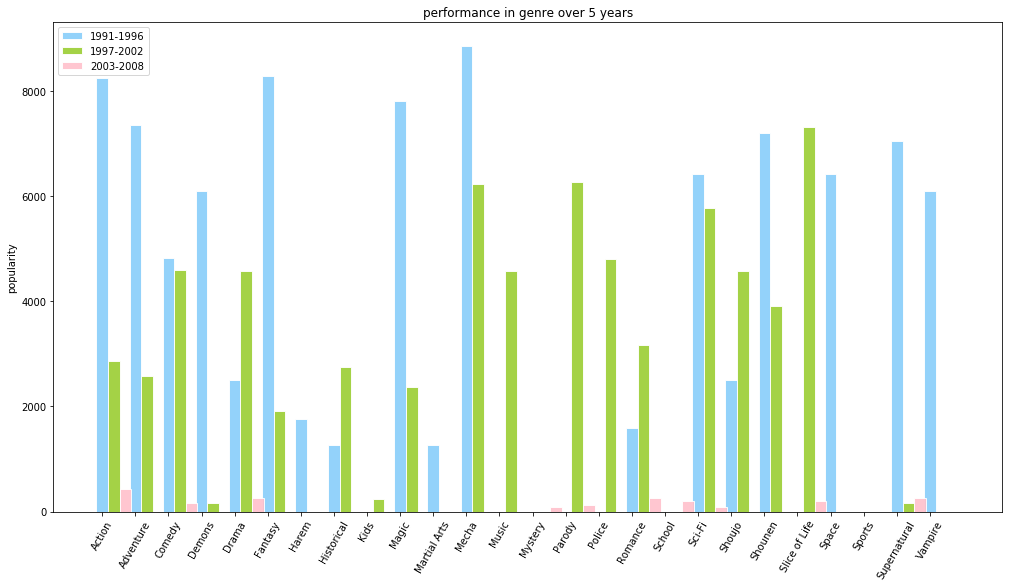

In [167]:
plt.figure(figsize = (17,9))
index = np.arange(26)
plt.bar(index, show1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='1991-1996', lw=1)
plt.bar(index+0.35, show2, alpha=0.9, width = 0.5, facecolor = 'yellowgreen', edgecolor = 'white', label='1997-2002', lw=1)
plt.bar(index+0.7, show3, alpha=0.9, width = 0.3, facecolor = 'pink', edgecolor = 'white', label='2003-2008', lw=1)
plt.xticks(np.arange(26),genres,rotation=60)
plt.ylabel('popularity')
plt.title('performance in genre over 5 years')
plt.legend(loc='upper left')
plt.savefig('performanceingenre.jpg')

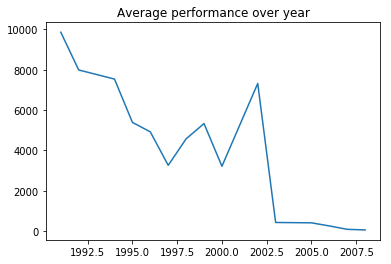

In [169]:
plt.plot(years[1:16],pop[1:16])

plt.title('Average performance over year')
plt.savefig('ave over year.jpg')

In [132]:
years[15]

2008

In [931]:
#Z.remove(Z[1])

In [932]:
Z=np.array(Z)

In [933]:
#years.remove(years[1])

In [934]:
len(Z)

14

In [861]:
genres
#[Police,Historical,Martial Arts,Sport,Space,Meche,Sci-Fi]
#[Comedy,Drama,Fantasy,Parody,Harem,Kids,Romance,Music,Shoujo,Shounen,School,Slice of Life]
#[Action,Adventure,Demons,Magic,Mystery,Supernatural,Vampire]

['Action',
 'Adventure',
 'Comedy',
 'Demons',
 'Drama',
 'Fantasy',
 'Harem',
 'Historical',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Romance',
 'School',
 'Sci-Fi',
 'Shoujo',
 'Shounen',
 'Slice of Life',
 'Space',
 'Sports',
 'Supernatural',
 'Vampire']

In [942]:
years

[1979,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2002,
 2003,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

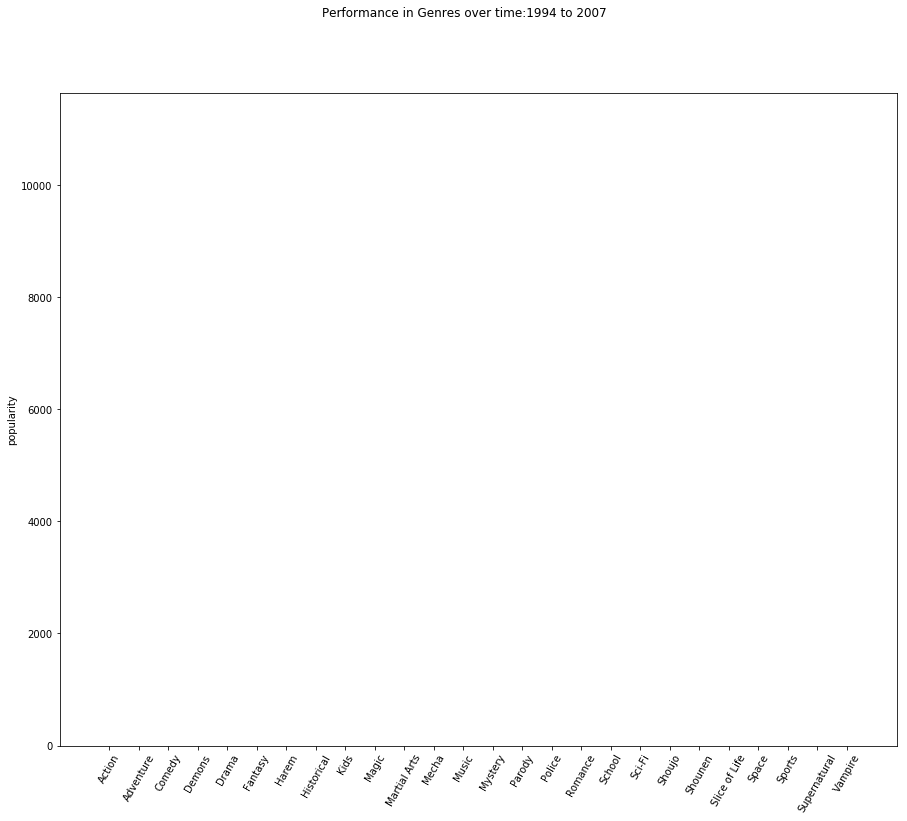

In [1093]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import numpy as np
if __name__ == "__main__":
    fig = plt.figure(figsize = (15,12))
    ims = []
    for i in range(1,14):
        #im = [0,0]
        #im[0]=plt.subplot(1,2,1)
        im=plt.bar(genres,Z[i])
        plt.xticks(np.arange(26),genres,rotation=60)
        plt.ylabel('popularity')
        plt.suptitle('Performance in Genres over time:1994 to 2007')
        #im[1]=plt.subplot(1,2,2)
        #plt.plot(popyear[1:i])
        ims.append(im)
    ani = animation.ArtistAnimation(fig, ims, interval=1000,repeat_delay=3000)
    ani.save("test.gif",writer='pillow')

1994